## Imports

In [5]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
from pyccel.epyccel import epyccel
from pyccel.decorators import types

import time

## Pure python function

In [2]:
def solve_2d_linearconv_pure(u, un, nt, dt, dx, dy, c):
    row, col = u.shape
    for n in range(nt+1):
        un=u.copy()
    for i in range(1,row):
        for j in range(1,col):
            u[j,i] = (un[j,i] - (c * dt/dx * (un[j,i] - un[j,i-1])) - (c * dt/dx * (un[j,i] - un[j-1,i])))
    return 0

            
    

## Numba accelerator

In [3]:
from numba import njit
@njit(nopython=True)
def solve_2d_linearconv_numba(u, un, nt, dt, dx, dy, c):
   
    row, col = u.shape

    #fill the update of u
    for n in range(nt+1):
        un=n.copy()
    for i in range(1,row):
        for j in range(1,col):
            u[j,i] = (un[j,i] - (c * dt/dx * (un[j,i] - un[j,i-1])) - (c * dt/dx * (un[j,i] - un[j-1,i])))
               
    return 0

/home/no/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:260: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


## Pyccel accelerator

In [6]:
@types('float[:,:]', 'float[:,:]','int', 'float', 'float','float','int')
def solve_2d_linearconv_pyccel(u, un, nt, dt, dx, dy, c):
   
    row, col = u.shape

    #fill the update of u and v
               
    return 0

## Inputs

/tmp/ipykernel_3325/3949030071.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_3325/3949030071.py:27: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


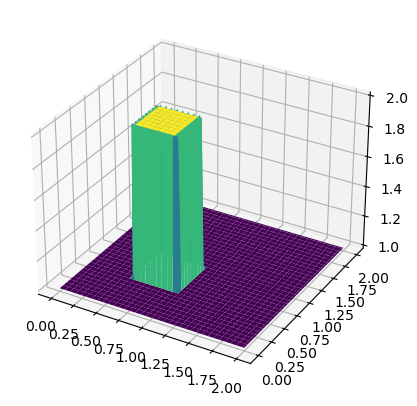

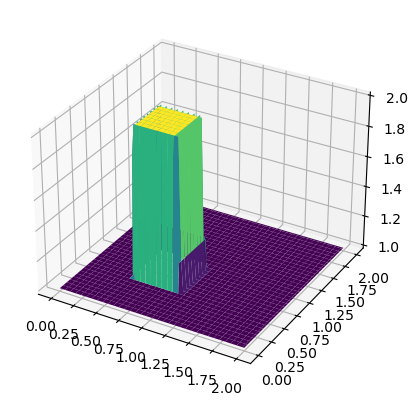

In [7]:
###variable declarations
nx = 101
ny = 101
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u0 = np.ones((ny, nx)) ##create a 1xn vector of 1's
u0[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
u = u0.copy()
un = np.ones((ny, nx)) 

solve_2d_linearconv_pure(u, un, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

## Call Funtions

### Pure function

In [11]:
%timeit solve_2d_linearconv_pure(u, un, nt, dt, dx, dy, c)

3.82 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [12]:
%timeit solve_2d_linearconv_numba(u, un, nt, dt, dx, dy, c)

77.8 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [13]:
solve_2d_linearconv_f90 = epyccel(solve_2d_linearconv_pyccel)

In [14]:
%timeit solve_2d_linearconv_f90(u, un, nt, dt, dx, dy, c)

152 ms ± 5.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
